# Prediction of Tesla's stock prices based on different predictions algorithms

The objective of this notebook is just to practice and experiment with differents machine learning models.

This practice is inspired by the challange presented in this [video](https://www.youtube.com/watch?v=JuLCL3wCEAk) by Siraj Raval and "Hands on Machine Learning with Scikit-Learn and Tensorflow" by Aurelien Geron.

The main idea is to train a different machine learning models on Tesla stock's historical data as well as the sentiment from news headlines and other data sources.



In [1]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Headlines Sentiment Analysis of NY Time's headlines about Tesla Motors

In [2]:
df = pd.read_pickle('./data/TSLA_stock_information.pkl')
df

,close,headlines
2010-06-29,23.889999,Tesla Increases Its Share Price to $17/_/Share...
2010-06-30,23.830000,Shares of Tesla Increase 40% on First Day of T...
2010-07-01,21.959999,Shares of Tesla Increase 40% on First Day of T...
2010-07-02,19.200001,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-03,18.427501,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-04,17.655001,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-05,16.882501,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-06,16.110001,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-07,15.800000,Tesla Motors Shares Drop Below Initial Sale Pr...
2010-07-08,17.459999,New Ventures Win Old Financiers /_/Big Compani...


In [3]:
df['close'] = df['close'].apply(np.int64)
df

,close,headlines
2010-06-29,23,Tesla Increases Its Share Price to $17/_/Share...
2010-06-30,23,Shares of Tesla Increase 40% on First Day of T...
2010-07-01,21,Shares of Tesla Increase 40% on First Day of T...
2010-07-02,19,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-03,18,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-04,17,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-05,16,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-06,16,Venture-Backed I.P.O.s Show Rebound as M&#038;...
2010-07-07,15,Tesla Motors Shares Drop Below Initial Sale Pr...
2010-07-08,17,New Ventures Win Old Financiers /_/Big Compani...


In [4]:
df = pd.concat([df,pd.DataFrame(columns=['compound','neg', 'neu','pos'])])
df = df.fillna(value='')
df

,close,compound,headlines,neg,neu,pos
2010-06-29,23.0,,Tesla Increases Its Share Price to $17/_/Share...,,,
2010-06-30,23.0,,Shares of Tesla Increase 40% on First Day of T...,,,
2010-07-01,21.0,,Shares of Tesla Increase 40% on First Day of T...,,,
2010-07-02,19.0,,Venture-Backed I.P.O.s Show Rebound as M&#038;...,,,
2010-07-03,18.0,,Venture-Backed I.P.O.s Show Rebound as M&#038;...,,,
2010-07-04,17.0,,Venture-Backed I.P.O.s Show Rebound as M&#038;...,,,
2010-07-05,16.0,,Venture-Backed I.P.O.s Show Rebound as M&#038;...,,,
2010-07-06,16.0,,Venture-Backed I.P.O.s Show Rebound as M&#038;...,,,
2010-07-07,15.0,,Tesla Motors Shares Drop Below Initial Sale Pr...,,,
2010-07-08,17.0,,New Ventures Win Old Financiers /_/Big Compani...,,,


In [5]:
sentiment_analyzer = SentimentIntensityAnalyzer()

for day in df.index:
    sentiment = None
    headlines = df.loc[day,'headlines'].split('/_/')
    for headline in headlines:
        headline = headline.lstrip()
        headline = unicodedata.normalize('NFKD', headline).encode('ascii','ignore')
        new_sentiment = sentiment_analyzer.polarity_scores(headline)
        if sentiment is None:
            sentiment = new_sentiment
        else:
             sentiment = { key : sentiment[key] + new_sentiment[key] for key in sentiment.keys()}
    qty = len(headlines)
    for key in sentiment.keys():
        df.set_value(day, key, sentiment[key]/qty)
df       

,close,compound,headlines,neg,neu,pos
2010-06-29,23.0,0.43005,Tesla Increases Its Share Price to $17/_/Share...,0,0.65275,0.34725
2010-06-30,23.0,0.376067,Shares of Tesla Increase 40% on First Day of T...,0,0.698333,0.301667
2010-07-01,21.0,0.376067,Shares of Tesla Increase 40% on First Day of T...,0,0.698333,0.301667
2010-07-02,19.0,0.32985,Venture-Backed I.P.O.s Show Rebound as M&#038;...,0,0.7405,0.2595
2010-07-03,18.0,0.32985,Venture-Backed I.P.O.s Show Rebound as M&#038;...,0,0.7405,0.2595
2010-07-04,17.0,0.32985,Venture-Backed I.P.O.s Show Rebound as M&#038;...,0,0.7405,0.2595
2010-07-05,16.0,0.32985,Venture-Backed I.P.O.s Show Rebound as M&#038;...,0,0.7405,0.2595
2010-07-06,16.0,0.32985,Venture-Backed I.P.O.s Show Rebound as M&#038;...,0,0.7405,0.2595
2010-07-07,15.0,0.30585,Tesla Motors Shares Drop Below Initial Sale Pr...,0.102,0.548,0.3505
2010-07-08,17.0,0.29295,New Ventures Win Old Financiers /_/Big Compani...,0,0.7565,0.2435


In [6]:
df.drop('headlines', axis=1, inplace=True)
#df['close'] = df['close'].apply(np.int64)
df

,close,compound,neg,neu,pos
2010-06-29,23.0,0.43005,0,0.65275,0.34725
2010-06-30,23.0,0.376067,0,0.698333,0.301667
2010-07-01,21.0,0.376067,0,0.698333,0.301667
2010-07-02,19.0,0.32985,0,0.7405,0.2595
2010-07-03,18.0,0.32985,0,0.7405,0.2595
2010-07-04,17.0,0.32985,0,0.7405,0.2595
2010-07-05,16.0,0.32985,0,0.7405,0.2595
2010-07-06,16.0,0.32985,0,0.7405,0.2595
2010-07-07,15.0,0.30585,0.102,0.548,0.3505
2010-07-08,17.0,0.29295,0,0.7565,0.2435


In [7]:
df.to_pickle('./data/TSLA_sentiment_information_.pkl')

In [8]:
# Splits sets

def add_lastday_label(X, y):
    X_size = X.shape
    new_set = np.zeros((X_size[0],X_size[1] +1))
    new_set[:, :-1] = X
    new_set[1:, -1] = y[:-1,0].reshape(y.shape[0]-1)
    return (new_set[1:, :], y[1:,:])

def split(dates, df, X_attr, y_attr):
    splits = []
    for start_date, end_date in dates:
        parcial_df = df.ix[start_date : end_date]
        X_set = parcial_df.as_matrix(columns = X_attr)
        y_set = parcial_df.as_matrix(columns = y_attr)
        splits.append([X_set, y_set])
    return splits

In [9]:



'''
train = df.ix[train_start_date : train_end_date]
val = df.ix[val_start_date : val_end_date]
test = df.ix[test_start_date:test_end_date]

X_train = train.as_matrix(columns=['neg', 'neu','pos'])
y_train = train.as_matrix(columns=['close'])

X_val = val.as_matrix(columns=['neg', 'neu','pos'])
y_val = val.as_matrix(columns=['close'])

X_test = test.as_matrix(columns=['neg', 'neu','pos'])
y_test = test.as_matrix(columns=['close'])

#adding last day close
X_train = add_lastday_price(X_train)
X_test = add_lastday_price(X_test)
'''


"\ntrain = df.ix[train_start_date : train_end_date]\nval = df.ix[val_start_date : val_end_date]\ntest = df.ix[test_start_date:test_end_date]\n\nX_train = train.as_matrix(columns=['neg', 'neu','pos'])\ny_train = train.as_matrix(columns=['close'])\n\nX_val = val.as_matrix(columns=['neg', 'neu','pos'])\ny_val = val.as_matrix(columns=['close'])\n\nX_test = test.as_matrix(columns=['neg', 'neu','pos'])\ny_test = test.as_matrix(columns=['close'])\n\n#adding last day close\nX_train = add_lastday_price(X_train)\nX_test = add_lastday_price(X_test)\n"

# First approach, test differents models with default hiperparameters in order to identify the best one
---

## First Model: Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

train_start_date = '20100629'
train_end_date = '20160629'

#val_start_date = '20150629'
#val_end_date = '20160629'

test_start_date = '20160630'
test_end_date = '20170911'

split_set = split([[train_start_date, train_end_date], [test_start_date,test_end_date]],
                  df, ['compound','neg', 'neu','pos'], ['close'] )

X_train, y_train = split_set[0]
X_test, y_test = split_set[1]

X_train, y_train  = add_lastday_label(X_train,y_train)

X_test, y_test = add_lastday_label(X_test, y_test)



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]


In [11]:
# Random forest without parametrizing -> risk of overfitting

random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
y_pred = random_forest.predict(X_test)
y_pred

array([ 205.96666667,  216.4       ,  214.3       ,  216.9452381 ,
        215.66969697,  209.50666667,  216.38969697,  215.94357143,
        214.36      ,  213.63666667,  229.59      ,  225.94285714,
        225.94285714,  229.59      ,  231.8       ,  220.36666667,
        229.59      ,  225.94285714,  222.1       ,  224.23333333,
        225.44166667,  224.28254401,  221.80435786,  229.25642857,
        226.78620321,  230.13501462,  229.07087968,  225.79166667,
        234.4       ,  235.9       ,  234.7       ,  226.96666667,
        228.        ,  221.79285714,  224.23333333,  236.475     ,
        236.475     ,  224.        ,  223.04285714,  222.4       ,
        234.64      ,  222.39333333,  229.25642857,  222.42748918,
        222.42748918,  222.42748918,  222.42748918,  222.9       ,
        222.9       ,  221.83333333,  222.42748918,  229.25642857,
        221.83333333,  221.80435786,  229.25642857,  221.80435786,
        220.77300153,  216.65524489,  218.81065102,  214.36   

In [13]:
print('Error: ', mean_absolute_error(y_test, y_pred))

# Gradient Boost regressson with early stopping -> TODO

('Error: ', 23.194004127055468)


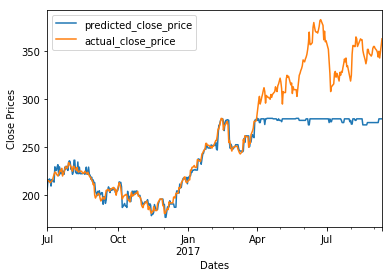

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

t_start_date = pd.to_datetime(test_start_date, format='%Y%m%d', errors='ignore') + timedelta(days=1)
t_start_date = t_start_date.strftime('%Y%m%d')

df_pred = pd.DataFrame(data=y_pred[0:], index = pd.date_range(t_start_date, test_end_date), columns=['predicted_close_price'])
df_y_test = df.ix[t_start_date:test_end_date]#['close']
df_y_test= df_y_test.filter(['close'], axis=1)
df_y_test = df_y_test.rename(columns={'close': 'actual_close_price'})


def plot_stock_dataframes(predictions_df, df_y_test):
    df_pred_plot = predictions_df.plot()
    df_pred_plot.set_xlabel('Dates')
    df_pred_plot.set_ylabel('Close Prices')
    fig = df_y_test.plot(ax = df_pred_plot).get_figure()
    
plot_stock_dataframes(df_pred, df_y_test)


## Conclusion
---
The random forest seems to overfit. Besides, the random forest cant generalize predictions in months after April  because it has never seen before output values higher than 260. In consequence, the algorithm can only output similar values respect the training set (the leaf of each decision tree represents average values of a set of points).
The inclusion of "last day closing price" was included because because the poor variety of headlines that were  founded. The ideal method is to train a model based only on the sentiments anlysis of the headlines, rather using previous information of the closing prices. Other algorithms that has "a short term" memory like recurrent neural networks are more suitable for working with time series and use previous information.

In [15]:
# In order to continue experimenting, the first thing that will be done is to shuffle the values of the data 
# in order to let the algorithm know different output values 

size = len(df.index)
train_test_split_index = int(size * 0.8)
df

,close,compound,neg,neu,pos
2010-06-29,23.0,0.43005,0,0.65275,0.34725
2010-06-30,23.0,0.376067,0,0.698333,0.301667
2010-07-01,21.0,0.376067,0,0.698333,0.301667
2010-07-02,19.0,0.32985,0,0.7405,0.2595
2010-07-03,18.0,0.32985,0,0.7405,0.2595
2010-07-04,17.0,0.32985,0,0.7405,0.2595
2010-07-05,16.0,0.32985,0,0.7405,0.2595
2010-07-06,16.0,0.32985,0,0.7405,0.2595
2010-07-07,15.0,0.30585,0.102,0.548,0.3505
2010-07-08,17.0,0.29295,0,0.7565,0.2435


In [16]:
shuffled_df = df.sample(frac=1)
shuffled_df

,close,compound,neg,neu,pos
2017-07-24,342.0,0,0,1,0
2011-04-15,25.0,0.2023,0,0.625,0.375
2011-08-30,24.0,0.0772,0,0.843,0.157
2011-10-22,28.0,0.25,0,0.5,0.5
2017-03-02,250.0,0,0,1,0
2016-04-11,249.0,0,0,1,0
2015-01-03,216.0,0,0,1,0
2011-07-24,28.0,0,0,1,0
2015-09-29,246.0,-0.10115,0.098,0.8275,0.0745
2013-09-02,168.0,0,0,1,0


In [17]:
train = shuffled_df[:train_test_split_index]
train

,close,compound,neg,neu,pos
2017-07-24,342.0,0,0,1,0
2011-04-15,25.0,0.2023,0,0.625,0.375
2011-08-30,24.0,0.0772,0,0.843,0.157
2011-10-22,28.0,0.25,0,0.5,0.5
2017-03-02,250.0,0,0,1,0
2016-04-11,249.0,0,0,1,0
2015-01-03,216.0,0,0,1,0
2011-07-24,28.0,0,0,1,0
2015-09-29,246.0,-0.10115,0.098,0.8275,0.0745
2013-09-02,168.0,0,0,1,0


In [18]:
test = shuffled_df[:train_test_split_index]
test

,close,compound,neg,neu,pos
2017-07-24,342.0,0,0,1,0
2011-04-15,25.0,0.2023,0,0.625,0.375
2011-08-30,24.0,0.0772,0,0.843,0.157
2011-10-22,28.0,0.25,0,0.5,0.5
2017-03-02,250.0,0,0,1,0
2016-04-11,249.0,0,0,1,0
2015-01-03,216.0,0,0,1,0
2011-07-24,28.0,0,0,1,0
2015-09-29,246.0,-0.10115,0.098,0.8275,0.0745
2013-09-02,168.0,0,0,1,0


In [19]:
X_train_shuffle =  train.as_matrix(columns = ['compound','neg', 'neu','pos'])
y_train_shuffle = train.as_matrix(columns=['close'])
X_test_shuffle =  test.as_matrix(columns = ['compound','neg', 'neu','pos'])
y_test_shuffle = test.as_matrix(columns=['close'])


X_train_shuffle, y_train_shuffle  = add_lastday_label(X_train_shuffle,y_train_shuffle)
X_test_shuffle, y_test_shuffle = add_lastday_label(X_test_shuffle, y_test_shuffle)

In [20]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_shuffle, y_train_shuffle)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
y_pred_shuffle = random_forest.predict(X_test_shuffle)
y_pred_shuffle

array([  25.6       ,   27.69166667,   26.4       , ...,  231.5       ,
         26.65      ,  252.        ])

In [22]:
print('Error: ', mean_absolute_error(y_test_shuffle, y_pred_shuffle))

('Error: ', 50.686515048899707)


In [23]:
# Predicting an ordered dataframe
y_pred = random_forest.predict(X_test)
y_pred
print('Error: ', mean_absolute_error(y_test, y_pred))

('Error: ', 72.644531549905167)


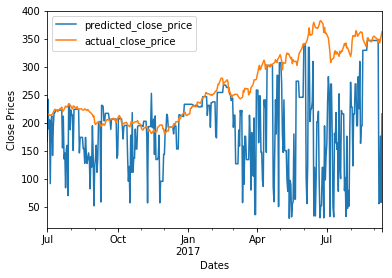

In [24]:


df_pred = pd.DataFrame(data=y_pred[0:], index = pd.date_range(t_start_date, test_end_date), columns=['predicted_close_price'])
df_y_test = df.ix[t_start_date:test_end_date]#['close']
df_y_test= df_y_test.filter(['close'], axis=1)
df_y_test = df_y_test.rename(columns={'close': 'actual_close_price'})


def plot_stock_dataframes(predictions_df, df_y_test):
    df_pred_plot = predictions_df.plot()
    df_pred_plot.set_xlabel('Dates')
    df_pred_plot.set_ylabel('Close Prices')
    fig = df_y_test.plot(ax = df_pred_plot).get_figure()
    
plot_stock_dataframes(df_pred, df_y_test)

In [ ]:
#Implement Exponential Wheighted Moving Avg

In [25]:
## Second Model: Regresor NN

In [4]:
## Third Model: Recurrent NN

In [ ]:
## Fourth Modek: DeepMind's WaveNet